이 글에서는 `matplotlib.pyplot`의 메소드인 `annotate`의 기능에 대해 쓰려고 한다.
조금 더 정확하게는, aiffel의 "Fundamental, SO3, 9-4" 과정의 코드 부분에 대해 쓰려고 한다.

# 1. matplotlib documents

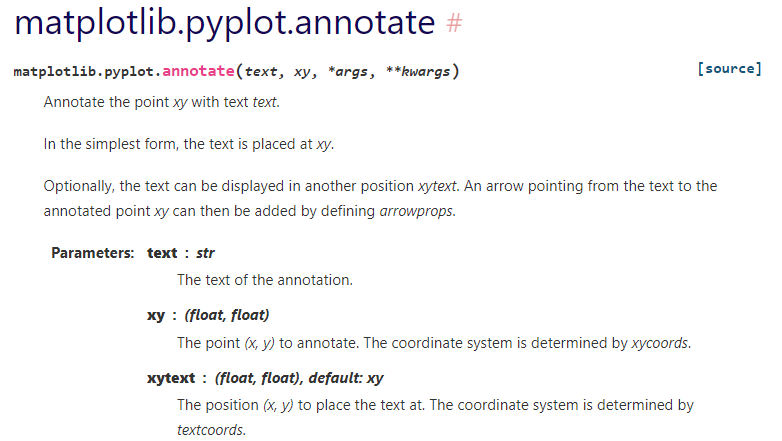

위의 캡쳐는 맷플롯립의 해당 메소드 `annotate`에 대한 설명이다.
`annotate` 명령어는 `text`와 `xy`를 기본적으로 인자로 받고, 추가적으로 `xytext`를 인자로 받는다.
위의 설명을 읽어보면
 - text : 주석 내용
     - 설명하고자 하는 예시 ("Fundamental, SO3, 9-4")에서는 "Low Price"가 이에 해당된다.
 - xy : 주석의 대상이 되는 곳의 (x좌표, y좌표)
     - 화살표의 끝(머리)에 해당하는 부분의 위치이다.
     - 설명하고자 하는 예시 ("Fundamental, SO3, 9-4")에서는 "(d, price.asof(d)+10)"가 이에 해당된다.
 - xytext : 주석의 위치에 대한 (x좌표, y좌표)
     - 화살표의 꼬리에 해당하는 부분의 위치이다.
     - 설명하고자 하는 예시 ("Fundamental, SO3, 9-4")에서는 "(d, price.asof(d)+100)"가 이에 해당된다.
     
이 문서의 끝에는 [다음](https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py)와 같은 링크를 걸어놓으며 `annoctate`를 사용하는 예시에 대해 적어놓고 있다.

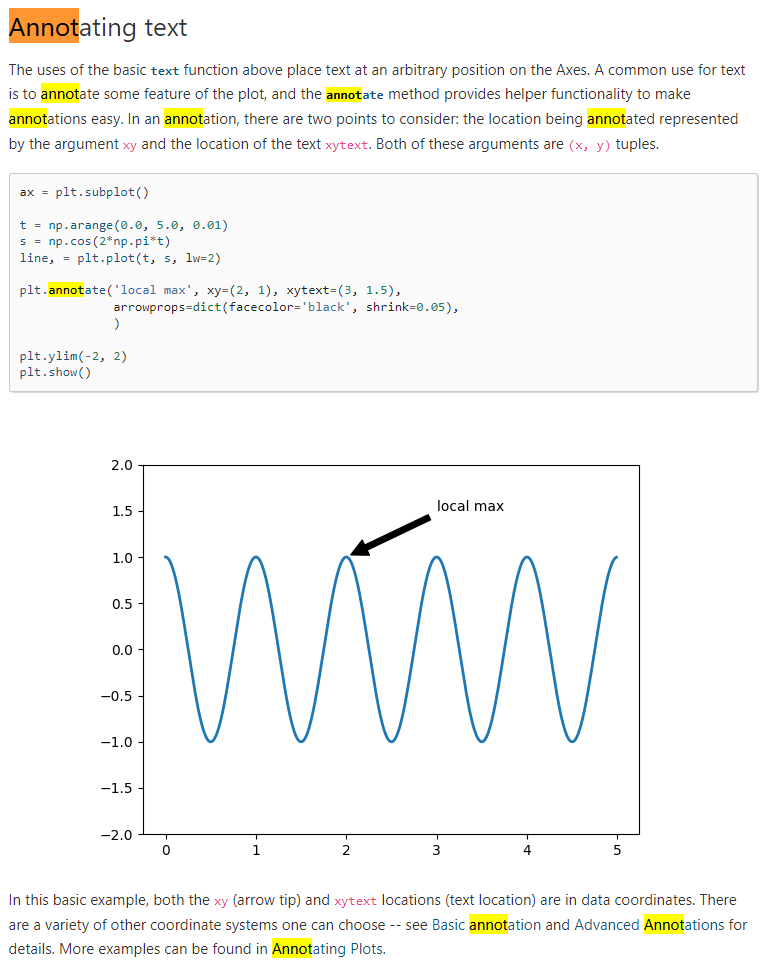

이 예제에서 `annotate` 메소드가 받는 세 개의 인자는 다음과같다.
 - text : 주석 내용
     - 여기서는 `local max`이다.
 - xy : 주석의 대상이 되는 곳의 (x좌표, y좌표)
     - 화살표의 끝(머리)에 해당하는 부분의 위치이다.
     - 여기서는 (2,1) 이다.
     - 그림을 잘 보면 정말 화살표의 끝부분이 (2,1)에 위치하는 것을 볼 수 있다.
 - xytext : 주석의 위치에 대한 (x좌표, y좌표)
     - 화살표의 꼬리에 해당하는 부분의 위치이다.
     - 여기서는 (3,1.5) 이다.
     - 그림을 잘 보면 정말 화살표의 끝부분이 (3,1.5)에 위치하는 것을 볼 수 있다.

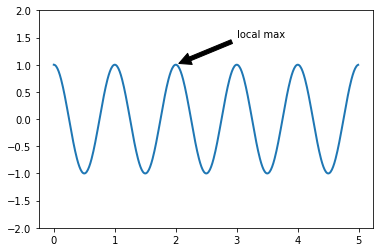

In [1]:
import matplotlib.pyplot as plt
import numpy as np

ax = plt.subplot()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()


# 2. pandas.Series.asof

설명하고자 하는 예시 ("Fundamental, SO3, 9-4")를 설명하려면 `annotate`만 봐서는 충분하지 않다.
`pandas`의 `asof`가 나왔으니 이게 무슨 역할을 하는지 봐야 한다.

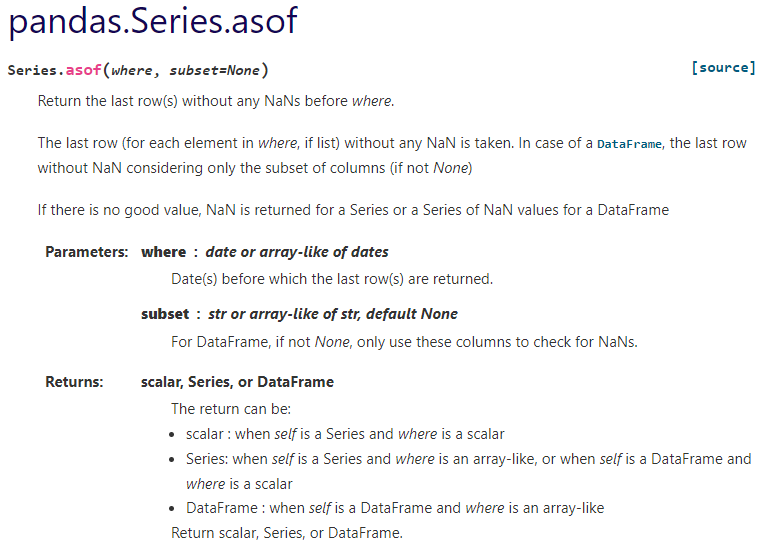

[이곳](https://pandas.pydata.org/docs/reference/api/pandas.Series.asof.html)에 올라와있는 위의 설명을 읽어보면, 뭔소린지는 잘 모르겠지만, 이 메소드가 `pd.Series`나 `pd.DataFrame`을 인자로 받는 메소드라고 되어 있다.

설명하고자 하는 예시 ("Fundamental, SO3, 9-4")에서는 `price`에 이 메소드를 적용할 것인데, `price`의 타입은 `pd.Series`이므로, `pd.Series`에 대해 다음과 같이 연습해봤다.

In [2]:
import pandas as pd

In [3]:
s = pd.Series([1, 2, np.nan, 4], index=[10, 20, 30, 40])
s

10    1.0
20    2.0
30    NaN
40    4.0
dtype: float64

In [4]:
s.asof(10)

1.0

In [5]:
s.asof(15)

1.0

In [6]:
s.asof(20)

2.0

In [7]:
s.asof(30)

2.0

In [8]:
s.asof(35)

2.0

In [9]:
s.asof(40)

4.0

In [10]:
s.asof([10, 20])

10    1.0
20    2.0
dtype: float64

In [11]:
s.asof([5, 20])

5     NaN
20    2.0
dtype: float64

`s`라는 `pd.Series`를 정의하고, `asof` 메소드를 적용시킨 후 여러 인자들을 넣어보았다.
 - 하나의 인자를 넣었을 때 (4번 ~ 9번 셀)
     - `10`을 인자로 넣으면 `1.0`을 출력한다.
     즉 인덱스를 인자로 넣으면, 그것에 대한 값(?, '값'이라는 말보다는 data라는 말이 더 어울리려나, 잘 모르겠다.)이 출력된다.
     - `15`를 인덱스로 넣으면 `1.0`을 출력한다.
     15는 인덱스가 지정되어 있지 않은데, 15보다 작은 값 중에서 가장 먼저 보이는 인덱스인 `10`에 대한 값을 출력하는 것 같다.
     - `30`을 인덱스로 넣으면 `1.0`을 출력한다.
     인덱스 `30`에 대한 값은 `NaN`(not a number)이다.
     이건 없는 값이므로, `30`에 대한 값을 내지 않고 `30`보다 작은 값 중에서 가장 먼저 보이는 인덱스인 `10`에 대한 값을 출력하는 것 같다.
     - `[10,20]`와 같이 리스트가 들어갈 수도 있는데, 이럴 때는 두 개의 값이 포함된 pd.Series 형태로 나온다.

준비가 다 된 것 같으니 이제 설명하고자 하는 예시 ("Fundamental, SO3, 9-4")를 볼 수 있다.

# 3. Fundamental, SO3, 9-4

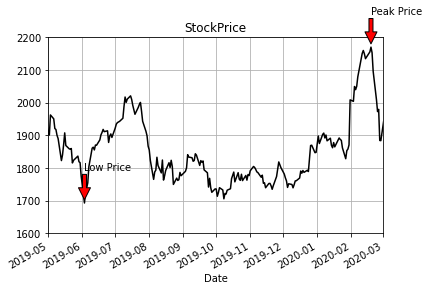

In [19]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import os

# 그래프 데이터 
csv_path = os.getenv("HOME") + "/aiffel/data_visualization/data/AMZN.csv"
data = pd.read_csv(csv_path ,index_col=0, parse_dates=True)
price = data['Close']
# 축 그리기 및 좌표축 설정
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
price.plot(ax=ax, style='black')
plt.ylim([1600,2200])
plt.xlim(['2019-05-01','2020-03-01'])

# 주석달기
important_data = [(datetime(2019, 6, 3), "Low Price"),(datetime(2020, 2, 19), "Peak Price")]
for d, label in important_data:
    ax.annotate(label, xy=(d, price.asof(d)+10), # 주석을 달 좌표(x,y)
                xytext=(d,price.asof(d)+100), # 주석 텍스트가 위차할 좌표(x,y)
                arrowprops=dict(facecolor='red')) # 화살표 추가 및 색 설정

# 그리드, 타이틀 달기
plt.grid()
ax.set_title('StockPrice')

# 보여주기
plt.show()

```
for d, label in important_data:
    ax.annotate(label, xy=(d, price.asof(d)+10), # 주석을 달 좌표(x,y)
                xytext=(d,price.asof(d)+100), # 주석 텍스트가 위차할 좌표(x,y)
                arrowprops=dict(facecolor='red')) # 화살표 추가 및 색 설정
```
문제의 이 부분이다.
`important_data`는  두 개로 구성되어 있는 리스트이므로, 그 중 하나만 보자.
즉 다음과 같은 코드로 바꾸어서 생각해보자.
```
d = (datetime(2019, 6, 3)
label = "Low Price"
ax.annotate(label, xy=(d, price.asof(d)+10), xytext=(d,price.asof(d)+100), arrowprops=dict(facecolor='red'))
```
 - text : 주석 내용
     - 여기서는 "Low Price"이다.
 - xy : 주석의 대상이 되는 곳의 (x좌표, y좌표)
     - 화살표의 끝(머리)에 해당하는 부분의 위치이다.
     - 여기서는 `(d, price.asof(d)+10)` 이다.
     - 다시 말해, x좌표는 `d = (datetime(2019, 6, 3)`이고
     - y좌표는 `price.asof(d)`의 값에 `10`을 더한 값이다.
     - `price.asof(d)`는 `d`에서의 주식의 종가(`close`)를 의미할 것이므로, `(d, price.asof(d))`라고 하면 (x좌표가 `d`인) 그래프 위의 한 점이다.
     - 그런데 거기다가 10을 더했으니, 그래프 위의 한 점 `(d, price.asof(d))`에서 위로 열 칸 올린 점이다.
     (조금 더 정확히 말하면 `(d, price.asof(d))`를 y축의 방향으로 10만큼 평행이동 시킨 점이다.)
     - 그곳에 화살표의 끝부분을 위치시키겠다는 것이다. 그림을 잘 보면, 화살표의 끝은 그래프 위의 점보다 살짝 떨어져 있는 것을 볼 수 있다.
 - xytext : 주석의 위치에 대한 (x좌표, y좌표)
     - 화살표의 꼬리에 해당하는 부분의 위치이다.
     - 여기서는 `(d,price.asof(d)+100)` 이다.
     - 마찬가지의 의미로 해석하면, `(d, price.asof(d))`에서 위로 열 칸 올린 점이다.
     (조금 더 정확히 말하면 `(d, price.asof(d))`를 y축의 방향으로 100만큼 평행이동 시킨 점이다.)
     - 그림을 잘 보면, 화살표의 꼬리부분, 그러니까 주석이 시작되는 위치는 아까 지정했던 위치보다 위에 있다.
     - 100을 200으로 바꾸거나 50으로 바꾸면, 그 의미를 더 잘 알 수 있게 되는 것 같다.

이상입니다!